In [1]:
#librerias a usar
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#cargar archivo csv
data = pd.read_csv('Ventas_totales_sin_nulos.csv')
# Eliminar la columna 'Unnamed'
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])
data.to_csv('Ventas_totales_sin_nulos.csv', index=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         65 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      65 non-null     float64
 9   tarjetas_credito                     65 non-null     float64
 10  otros_medios                         65 non-null     float64
 11  ventas_totales_grupo_articulos    

In [11]:
valores_nulos = data.isnull().sum()
valores_nulos

indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

In [13]:
#creo 2 dataframes para poder poder procesar los outliers
cuantitativas = data.iloc[:, 1:23]
cualitativas = data.iloc[:, [0]]

In [18]:
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   indice_tiempo  65 non-null     object
dtypes: object(1)
memory usage: 652.0+ bytes


<Figure size 1500x1800 with 0 Axes>

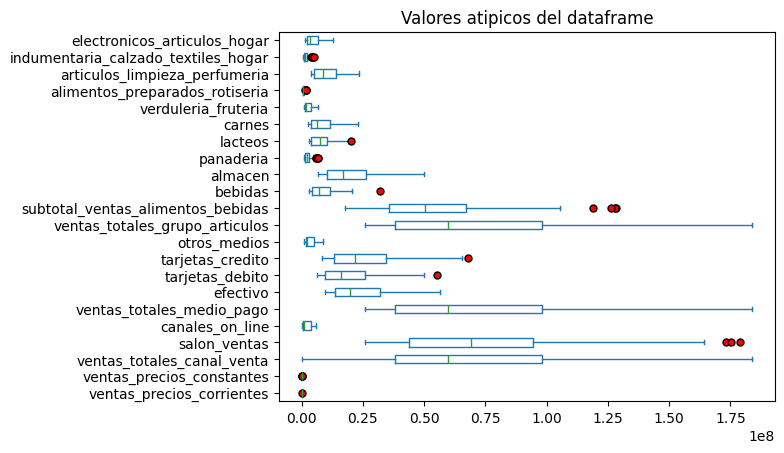

In [22]:
#realizamos diagramas de cajas o bigote para identificar los outliers
fig = plt.figure(figsize=(15, 18))
cuantitativas.plot(kind='box', vert=False, flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
plt.title("Valores atipicos del dataframe")
plt.show()

**Procesamiento "Desviación estandar" para eliminar outliers en dataframe**

In [24]:
#Metodo aplicando desviaion estandar. Encuentro los valores extremos
y = cuantitativas
Limite_superior = y.mean() + 3*y.std()  
Limite_inferior = y.mean() - 3*y.std()  
print("Limite superior permitido: ", Limite_superior)
print("Limite inferior permitido: ", Limite_inferior)

Limite superior permitido:  ventas_precios_corrientes              2.143126e+05
ventas_precios_constantes              4.002291e+04
ventas_totales_canal_venta             2.074407e+08
salon_ventas                           1.971276e+08
canales_on_line                        7.623053e+06
ventas_totales_medio_pago              2.059531e+08
efectivo                               6.191160e+07
tarjetas_debito                        5.821184e+07
tarjetas_credito                       7.518871e+07
otros_medios                           1.075383e+07
ventas_totales_grupo_articulos         2.059531e+08
subtotal_ventas_alimentos_bebidas      1.424194e+08
bebidas                                2.648442e+07
almacen                                5.498569e+07
panaderia                              6.985710e+06
lacteos                                2.223825e+07
carnes                                 2.509435e+07
verduleria_fruteria                    7.570093e+06
alimentos_preparados_rotiseria      

In [ ]:
#obtenemos datos y los outliers se convierten en nulos en el Dataframe
data3 = cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
data3.isnull().sum()

ventas_precios_corrientes              0
ventas_precios_constantes              2
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    1
electronicos_articulos_hogar           0
dtype: int64

In [27]:
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(), 2))
data_clean.isnull().sum()

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
dtype: int64

<Figure size 1500x1800 with 0 Axes>

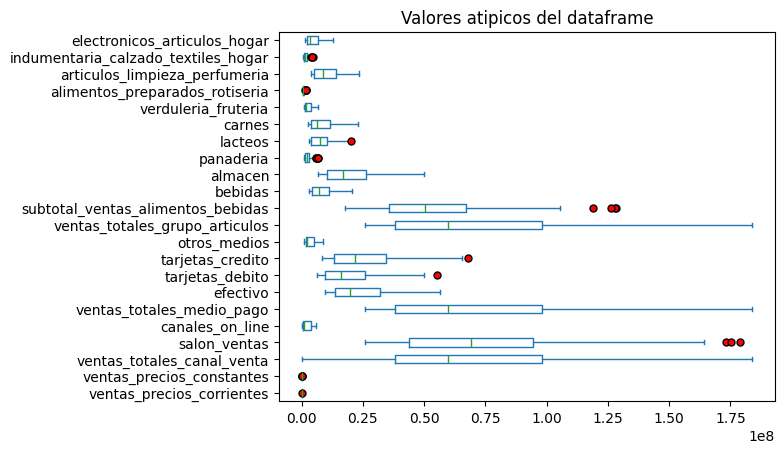

In [28]:
#realizamos diagramas de cajas o bigote para identificar los outliers
fig = plt.figure(figsize=(15, 18))
data_clean.plot(kind='box', vert=False, flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
plt.title("Valores atipicos del dataframe")
plt.show()

**Procedimiento "cuantiles" para sustituir outliers en dataframe**

In [29]:
#Metodo para aplicar cuartiles. Encuentro cuartiles de .25 y .75
y = cuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q2
iqr = percentile75 - percentile25   

Limite_superior_iqr = percentile75 + 1.5*iqr
Limite_inferior_iqr = percentile75 - 1.5*iqr

print("Limite superior permitido: ", Limite_superior_iqr)
print("Limite inferior permitido: ", Limite_inferior_iqr)

Limite superior permitido:  ventas_precios_corrientes              1.923194e+05
ventas_precios_constantes              3.193875e+04
ventas_totales_canal_venta             1.875116e+08
salon_ventas                           1.704401e+08
canales_on_line                        9.196781e+06
ventas_totales_medio_pago              1.875116e+08
efectivo                               5.942022e+07
tarjetas_debito                        5.095222e+07
tarjetas_credito                       6.619178e+07
otros_medios                           1.065047e+07
ventas_totales_grupo_articulos         1.875116e+08
subtotal_ventas_alimentos_bebidas      1.145480e+08
bebidas                                2.282518e+07
almacen                                5.015298e+07
panaderia                              5.344003e+06
lacteos                                1.994066e+07
carnes                                 2.390920e+07
verduleria_fruteria                    7.832862e+06
alimentos_preparados_rotiseria      

In [31]:
#obtenemos datos limpios del dataframe
data3_iqr = cuantitativas[(y <= Limite_superior_iqr) & (y >= Limite_inferior_iqr)]  
data3_iqr.isnull().sum()

ventas_precios_corrientes              3
ventas_precios_constantes              4
ventas_totales_canal_venta             1
salon_ventas                           3
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        1
tarjetas_credito                       1
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      9
bebidas                                1
almacen                                0
panaderia                              4
lacteos                                1
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         4
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    4
electronicos_articulos_hogar           0
dtype: int64

In [32]:
#Reemplazar valores atipicos (nulos) del dataframe con "mean"
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(), 2))
data4_iqr.isnull().sum()

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
dtype: int64

In [34]:
#unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         65 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      65 non-null     float64
 9   tarjetas_credito                     65 non-null     float64
 10  otros_medios                         65 non-null     float64
 11  ventas_totales_grupo_articulos    

In [35]:
Datos_limpios.to_csv('Ventas_totales_datos_limpios.csv')